## Project 2 - Convolutional Neural Network Application

### 0. Import Libraries

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization,Input
from sklearn.metrics import classification_report
from keras.callbacks import ReduceLROnPlateau

### 1. Load Data

In [11]:
# Importing
train_df = pd.read_csv("sign_mnist_train.csv")
test_df = pd.read_csv("sign_mnist_test.csv")

# Shuffling
train_df.sample(frac=1)
test_df.sample(frac=1)

train_df['label'] = [x - 1 if x > 9 else x for x in train_df['label']]
test_df['label'] = [x - 1 if x > 9 else x for x in test_df['label']]

In [12]:
# Setting x and y
y_train=train_df['label']
y_test=test_df['label']


x_train=train_df.drop('label',axis=1)
x_test=test_df.drop('label',axis=1)

labels=len(set(y_train))

#....................................#
# define x_train y_train, x_test y_test
#....................................#


# Normalization
#....................................#
# Normalize data in the range of zero to one
min=x_train.min(axis=0)
max=x_train.max(axis=0)
x_train=(x_train - min)/(max - min)
x_test=(x_test - min)/(max - min)
#....................................#

# Reshaping
x_train = x_train.values.reshape(-1, 28, 28, 1)
x_test = x_test.values.reshape(-1, 28, 28, 1)

#### Visualize Data

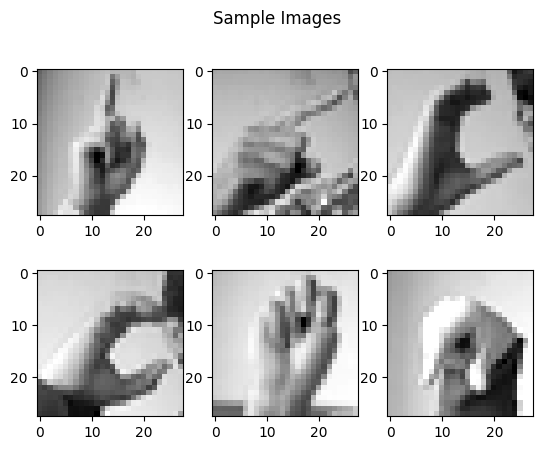

In [13]:
f, axes = plt.subplots(2,3)
f.suptitle('Sample Images')
img = 0
for i in range(2):
    for j in range(3):
        axes[i,j].imshow(x_train[img].reshape(28, 28), cmap="gray")
        img += 1

Text(0.5, 1.0, 'Frequency of Each Letter')

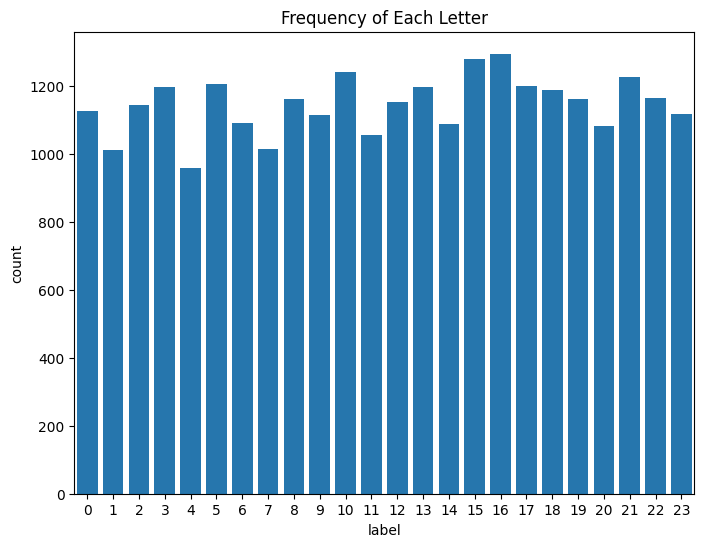

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(x=y_train, saturation=0.9)
plt.title("Frequency of Each Letter")

In [15]:
# from tensorflow.keras.utils import to_categorical
# y_test=to_categorical(y_test,len(set(y_train)))
# y_train=to_categorical(y_train,len(set(y_train)))
# y_train

### 2. Build Convolutional Neural Network (CNN)

In [16]:
model = Sequential()

#....................................#
#
# Build CNN
model=Sequential([
    
    Conv2D(kernel_size=(4,4),filters=49,activation='relu',input_shape=(28,28,1)),

    BatchNormalization(),

    MaxPool2D(pool_size=(4,4),strides=2),

    Conv2D(filters=98,kernel_size=(4,4),activation='relu'),

    MaxPool2D(pool_size=(4,4),strides=1),

    Conv2D(filters=196,kernel_size=(4,4),activation='relu'),

    Dropout(rate=0.3),

    Flatten(),

    Dense(units=49,activation='relu'),

    Dropout(rate=0.25),

    Dense(units=labels,activation='softmax')
         
              ])
#
#....................................#


model.summary()

c:\Users\www.Amirpc.com\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 25, 25, 49)     │           833 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 25, 25, 49)     │           196 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 11, 11, 49)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 98)       │        76,930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 98)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 2, 2, 196)      │       307,524 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 196)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 49)             │        38,465 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 49)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 24)             │         1,200 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 425,148 (1.62 MB)

 Trainable params: 425,050 (1.62 MB)

 Non-trainable params: 98 (392.00 B)

In [ ]:
#....................................#
#
# Train CNN
epochs=25
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_loss',   
    factor=0.1,          
    patience=5,         
    min_lr=1e-6,         
    verbose=1     

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#
#....................................#

history = model.fit(x_train, y_train, batch_size=128, epochs=epochs, validation_data=(x_test, y_test), callbacks=[learning_rate_reduction])

Epoch 1/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.6544 - loss: 1.1059 - val_accuracy: 0.8924 - val_loss: 1.7501 - learning_rate: 0.0010
Epoch 2/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.9766 - loss: 0.0769 - val_accuracy: 0.9126 - val_loss: 0.3546 - learning_rate: 0.0010
Epoch 3/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9880 - loss: 0.0405 - val_accuracy: 0.9173 - val_loss: 0.2975 - learning_rate: 0.0010
Epoch 4/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9911 - loss: 0.0303 - val_accuracy: 0.9534 - val_loss: 0.1669 - learning_rate: 0.0010
Epoch 5/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.9870 - loss: 0.0419 - val_accuracy: 0.9633 - val_loss: 0.1610 - learning_rate: 0.0010
Epoch 6/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.9966 - loss: 0.0120 - val_accuracy: 0.9453 - val_loss: 0.2746 - learning_rate: 0.0010
Epoch 7/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.9973 - loss: 0.

### 3. Evaluate Model

In [22]:
predictions = model.predict(x_test, batch_size=128)
labels = ["Label " + str(i) for i in range(25) if i != 9]
predictions=np.argmax(predictions, axis=1) 
print(classification_report(y_test, predictions, target_names = labels))

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
              precision    recall  f1-score   support

     Label 0       1.00      1.00      1.00       331
     Label 1       1.00      0.99      1.00       432
     Label 2       1.00      0.98      0.99       310
     Label 3       1.00      1.00      1.00       245
     Label 4       1.00      0.99      1.00       498
     Label 5       1.00      1.00      1.00       247
     Label 6       1.00      0.94      0.97       348
     Label 7       1.00      1.00      1.00       436
     Label 8       1.00      1.00      1.00       288
    Label 10       1.00      1.00      1.00       331
    Label 11       1.00      1.00      1.00       209
    Label 12       1.00      0.99      1.00       394
    Label 13       1.00      1.00      1.00       291
    Label 14       0.98      1.00      0.99       246
    Label 15       0.95      1.00      0.97       347
    Label 16       1.00      1.00      1.00       164
    Label 17       1.00      1.00      1.0

### 4. Plots

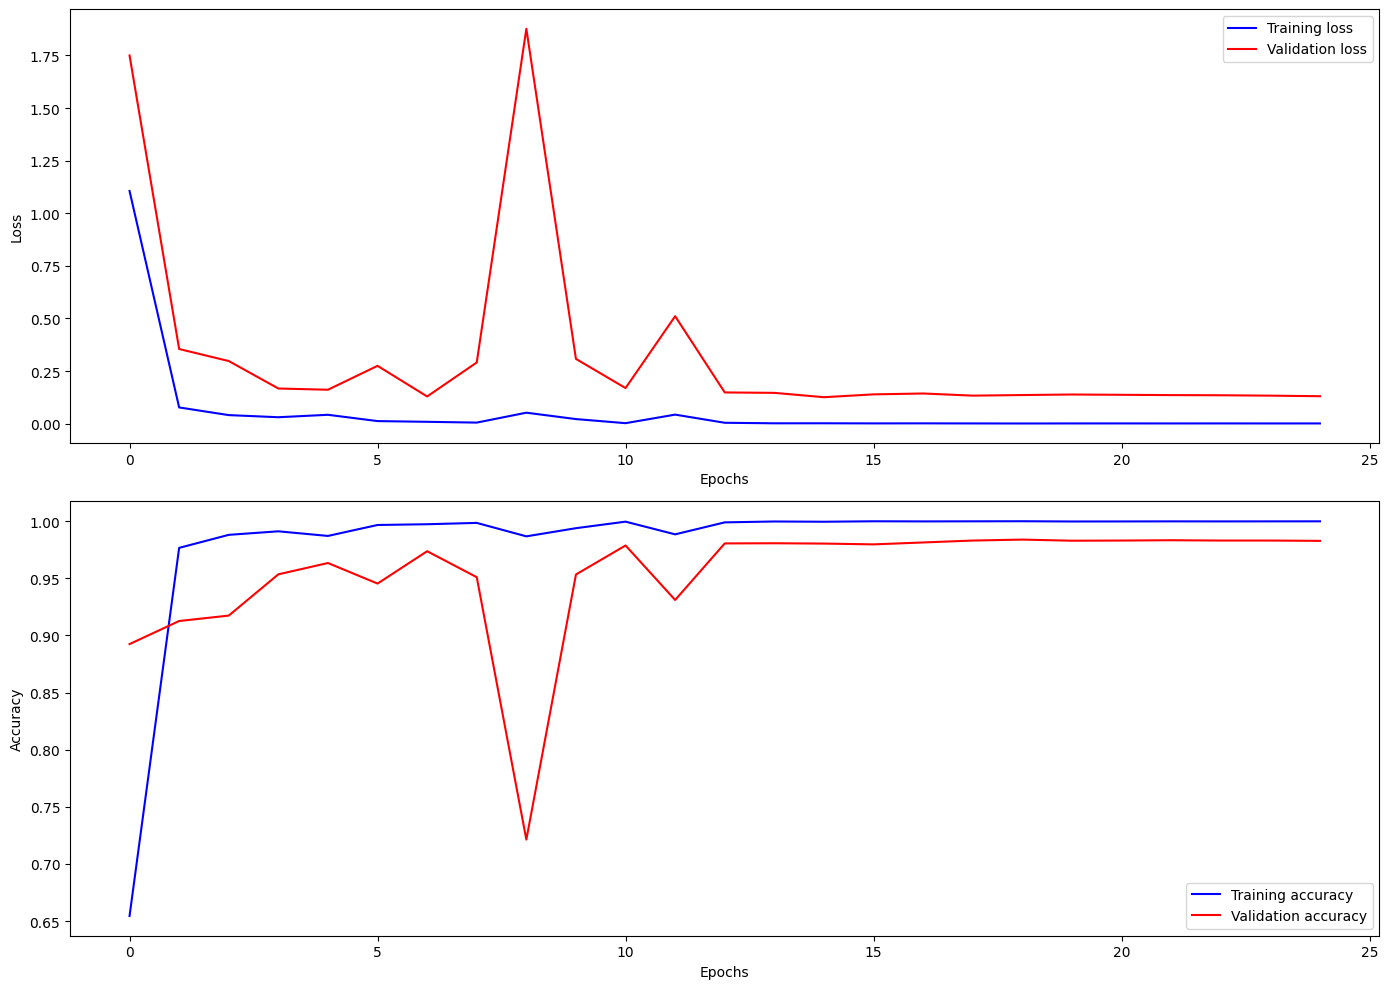

In [26]:
# Create figure and axes
fig, axes = plt.subplots(2, 1)
fig.set_size_inches(14, 10)

# Plot training and validation loss
axes[0].plot(history.history['loss'], color='b', label="Training loss")
axes[0].plot(history.history['val_loss'], color='r', label="Validation loss")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend()

# Plot training and validation accuracy
axes[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
axes[1].plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")
axes[1].legend()

plt.tight_layout()  # Adjust spacing between subplots
plt.show()  # Display the figure